#Pergunta fundamental

Qual processo produziu estes dados?

#Exemplo-Base (Combustível)
Gilton tem um HB20. Ao longo de 100 dias, ele mediu a eficiência de uso do combustível de seu carro (em milhas por galão). Esta história é [contada aqui](https://dasl.datadescription.com/datafile/nissan/?_sf_s=nissan&_sfm_cases=4+59943).

Os dados coletados por Gilton são recuperados, convertidos para quilômetros por litro e mostrados abaixo.

--2023-12-15 16:02:11--  https://dasl.datadescription.com/download/data/3367
Resolving dasl.datadescription.com (dasl.datadescription.com)... 45.79.130.90
Connecting to dasl.datadescription.com (dasl.datadescription.com)|45.79.130.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 685 [text/plain]
Saving to: ‘3367’

3367                100%[===================>]     685  --.-KB/s    in 0s      

2023-12-15 16:02:12 (87.0 MB/s) - ‘3367’ saved [685/685]



count    100.000000
mean       9.528907
std        1.040449
min        6.243197
25%        8.861395
50%        9.375425
75%       10.197385
max       11.979167
Name: kml, dtype: float64

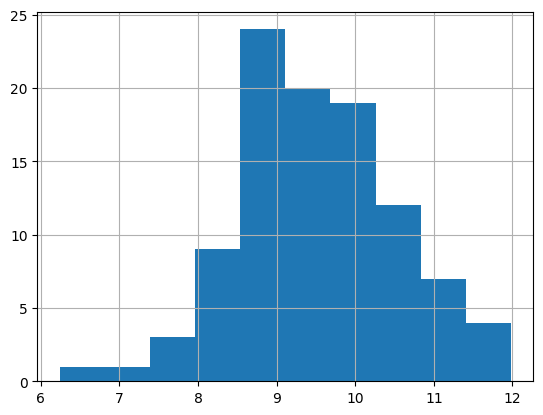

In [ ]:
!wget https://dasl.datadescription.com/download/data/3367

import pandas as pd

dados = pd.read_csv("3367")
kml = dados.mpg.div(2.352)
dados["kml"] = kml
dados.kml.hist()
dados.kml.describe()

Gilton fará uma viagem de 500 km. Sabendo que o tanque de combustível de seu carro é de 70 litros, que ele encheu o tanque antes de partir, e que ele não fará paradas para repor combustível, calcule a probabilidade de Gilton ficar sem combustível na viagem.

##Solução

Assumindo que a eficência ($E$) é uma VA, iremos primeiramente construir a VA do rendimento do carro ($R$, em Km) com um tanque de 70 litros, para isso fazemos $R = 70 \times E$. Abaixo fazemos isso e observamos a distribuição. Observe que a mudança que fizemos não altera a forma geral da distribuição.

count    100.000000
mean     667.023512
std       72.831461
min      437.023810
25%      620.297619
50%      656.279762
75%      713.816964
max      838.541667
Name: rend, dtype: float64

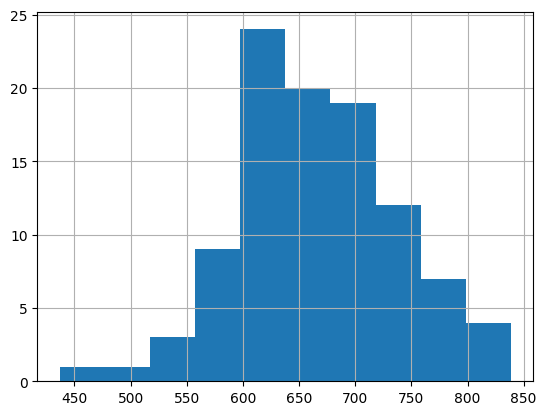

In [ ]:
rend=dados.kml.mul(70)
dados["rend"]=rend
dados.rend.hist()
dados.rend.describe()

A partir dos dados podemos calcular o percentual de $R$ cujo valor é menor do que 500 km, o que fazemos abaixo e obtemos uma probabilidade de ficar sem combustível de 2%.

In [ ]:
filtrado = dados[dados.rend < 500]
print(filtrado.rend.count()/dados.rend.count())

0.02


Se o que temos é uma amostra, qual será este valor para a população?

# Modelando dados por distribuições de probabilidade

Algumas vezes precisamos encontrar um modelo para um conjunto de dados. Por exemplo, como uma etapa para criar um modelo de analítico ou de simulação.

<u>Distribuições de probabilidade são a forma mais simples de modelar um conjunto de dados 1D</u>, i.e., quando temos apenas uma única variável aleatória e não temos controle de quaisquer outros fatores que nela interfiram. Uma distribuição de probabilidade <u>é simples porque parte apenas da forma como os dados se distribuem</u>.

Para tanto, dada uma amostra, realizamos 3 passos:

1. Escolhemos uma distribuição de probabilidade
2. Estimamos os parâmetros da distribuição escolhida a partir dos dados
3. Verificamos a qualidade do ajuste

Observe que podemos repetir estes passos para diferentes distribuições de probabilidade, fazendo com que o passo 1 não seja tão relevante. O passo 3 é feito por meio de um teste de aderência.



#Estimativa por Máxima Verossimilhança

Dada uma amostra de dados $X=\{x_1,x_2,\ldots,x_n\}$ de tamanho $n$ e uma distribuição candidata $D$ com $p$ parâmetros $\theta=(\theta_1,\theta_2,\ldots,\theta_p)$, podemos calcular a probabilidade de obtermos a amostra $X$.

Observe que para um único valor $x_i$ da amostra, podemos definir a probabilidade de obtê-lo dado um vetor de parâmetros $\theta$ como sendo
$P_D(x_i|\theta)$. Assumindo que os dados são **independente e identicamente distribuídos** (iid), então cada item da amostra foi obtido de forma independente da mesma distribuição de probabilidade. Assim, podemos calcular a probabilidade de obtermos a amostra pela **função de probabilidade conjunta**, que será um produto dos termos

$L(\theta) = \prod_{i=1}^{n}P_D(x_i|\theta)$

Portanto $L(\theta)$ é a **função de verossimilhança** (em inglês, *likelihood*) da amostra $X$, e nós queremos encontrar $\hat{\theta}$ que maximiza esta função. Formalmente o Estimador de Máxima Verossimilhança (MLE - *Maximum Likelihood Estimator*) é

$\hat{\theta} = \text{arg max}_{\theta} L(\theta)$.

Como a distribuição de probabilidade é escolhida a priori, calcular esta função é possível. Contudo, para encontrar o ponto de máximo, precisamos encontrar a derivada de um produto o que facilmente nos leva a expressões bem complicadas. Uma forma de solucionar isso é **tomarmos o logaritmo da verossimilhança**, transformando o produto em uma soma e facilitando o cálculo.

$\hat{\theta} = \text{arg max}_{\theta} \; \text{log}L(\theta)$.

## Exemplo (Binomial)
Em $n$ jogadas independentes de uma moeda você observou $k$ caras. Este é um experimento Binomial, sabendo disso use o princípio de máxima verossimilhança para estimar $p$.

**Solução**: O parâmetro desconhecido $\theta = p$. Então, nossa função de verossimilhança é

$L(\theta) = P(X=k|n,\theta) \\
L(\theta) = \binom{N}{k}\theta^k(1-\theta)^{(n-k)} \\
\log{L(\theta)} = \log{\binom{N}{k}} + k\log{\theta} + (n-k)\log{(1-\theta)}$

Para encontrarmos o valor de $\theta$ que maximiza a função, fazemos:

$\frac{\partial \log{L(\theta)}}{\partial \theta} = 0$

Logo,

$\frac{k}{\theta} - \frac{n-k}{1-\theta} = 0 \\
\frac{k}{\theta} = \frac{n-k}{1-\theta} \\
k(1-\theta) = (n-k)\theta \\
n\theta = k \Rightarrow \hat{\theta} = \frac{k}{n} = p$

O método MLE produz um resultado que é natural para a maioria das pessoas. Isto significa que esta forma simples de estimativa do parâmetro $p$ é também o Estimador de Máxima Verossimilhança deste parâmetro da distribuição binomial.

## Exemplo (Normal)
Dado um conjunto de dados $x_1,\ldots,x_n$ que nós queremos modelar por uma distribuição normal. Use o MLE para estimar a média e o desvio da distribuição normal.

**Solução**: Neste caso, faremos $\mu = \theta_1$ e $\sigma = \theta_2$. Assim, a função de verossimilhança deste conjunto de dados é dada por

$L(\theta_1,\theta_2) = P(x_1,\ldots,x_n|\theta_1,\theta_2) \\
L(\theta_1,\theta_2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\theta_2}} e^{-\frac{(x_i-\theta_1)^2}{2\theta_2^2}} \\
\log{L(\theta_1,\theta_2)} = \sum_{i=1}^{n} (\log{\frac{1}{\sqrt{2\pi\theta_2}}} -\frac{(x_i-\theta_1)^2}{2\theta_2^2}) \\
\log{L(\theta_1,\theta_2)} = \sum_{i=1}^{n} -\frac{(x_i-\theta_1)^2}{2\theta_2^2} + n\log{1}-n\log{\sqrt{2\pi\theta_2}} \\
\log{L(\theta_1,\theta_2)} = \frac{1}{2\theta_2^2}\sum_{i=1}^{n} -(x_i-\theta_1)^2 -\frac{n}{2}\log{2\pi}-\frac{n}{2}\log{\theta_2}$

Solucionando para $\theta_1$:

$\frac{\partial \log{L(\theta_1,\theta_2)}}{\partial \theta_1} = 0 \\
\frac{1}{2\theta_2^2}\sum_{i=1}^{n} 2(x_i-\theta_1)=0 \\
\sum_{i=1}^{n} (x_i-\theta_1)=0 \\
\sum_{i=1}^{n}x_i - n\theta_1 =0 \Rightarrow \hat{\theta_1} = \frac{\sum_{i=1}^{n}x_i}{n} = \bar{x}$

Solucionando para $\theta_2$:

$\frac{\partial \log{L(\theta_1,\theta_2)}}{\partial \theta_2} = 0 \\
\frac{-2\sum_{i=1}^{n} -(x_i-\theta_1)^2}{2\theta_2^3} -\frac{n}{2\theta_2} = 0 \\
\frac{\sum_{i=1}^{n} (x_i-\theta_1)^2}{2\theta_2^3} = \frac{n}{2\theta_2} \\
\theta_2^2 = \frac{\sum_{i=1}^{n} (x_i-\theta_1)^2}{n} \\
\theta_2 = \pm \sqrt{\frac{\sum_{i=1}^{n} (x_i-\theta_1)^2}{n}}$


Assim vemos que a média e o desvio-padrão (não ajustado) de uma amostra são os estimadores de máxima verossimilhança de uma distribuição normal.

## Exemplo (MLE Numericamente)

Nem sempre é tratável termos a solução algébrica do MLE para uma distribuição de probabilidade. Nestes casos, podemos obter a estimativa dos parâmetros por meio de otimização numérica.

Abaixo nós mostramos como fazer isso.

**Solução**: Comecemos gerando uma amostra de uma distribuição normal de tamanho 30 com média 10 e desvio-padrão 2. Esta será nossa amostra de teste para demonstrar o método.



In [ ]:
import scipy.stats as st

X = st.norm.rvs(10,2,size=30)

Suponha então que queremos ajustar uma distribuição normal aos dados, estimando os parâmetros $\mu$ e $\sigma$ por meio do método da máxima verossimilhança. A biblioteca ```scipy``` já traz um método para cada distribuição em que podemos acessar o log da pdf da distribuição, de modo que não precisaremos computar manualmente.

Assim, definimos a função que vai ser otimizada. Observe que modificamos a soma para um número negativo, de modo a podermos minimizar a função, já que a biblioteca que usaremos para otimização numérica suporta minimização.

In [ ]:
def L_(theta,x):
  return -sum(st.norm.logpdf(x,theta[0],theta[1]))

O próximo passo é encontrar as estimativas de $\mu$ e $\sigma$ que otimizam a função de verossimilhança.

In [ ]:
from scipy.optimize import minimize
import numpy as np

resp = minimize(L_,np.array([0.1,0.1]),args=(X), method = 'Nelder-Mead')
print(resp.message)
print(resp.x[0],resp.x[1])

Optimization terminated successfully.
9.759988194492554 1.9888380050890722


Abaixo usamos um método da biblioteca ```scipy``` que obtém os parâmetros da distribuição por meio da máxima verossimilhança (funciona para outras distribuições existentes na ```scipy```).

In [ ]:
print(st.norm.fit(X))

(9.760028260249415, 1.98880187263641)


Abaixo podemos ver os dados e a qualidade da distribuição estimada.

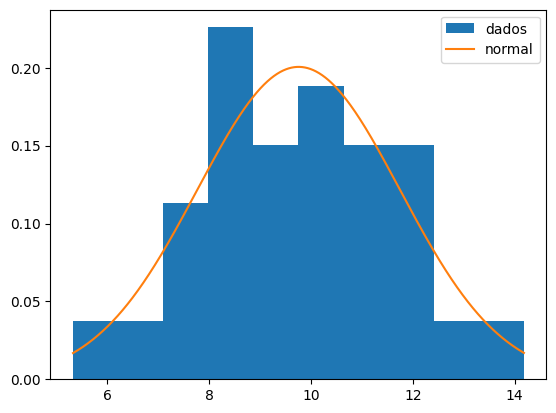

In [ ]:
import matplotlib.pyplot as plt

sup = np.linspace(min(X),max(X),1000)
f=st.norm.pdf(sup,resp.x[0],resp.x[1])

plt.hist(X,label="dados",density=True)
plt.plot(sup,f,label="normal")
plt.legend()
plt.show()

# Como saber se o modelo é adequado?

Neste caso devemos usar um **teste de aderência** para verificar se os dados aderem à distribuição. Aqui usamos o **teste qui-quadrado**, neste teste construímos a frequência observada e a frequência esperada com base na distribuição. A **hipótese nula deste teste é que os dados seguem a distribuição em análise**.

Os dados são distribuídos em grupos e deve-se garantir que em cada grupo **haja pelo menos 5 amostras** tanto na frequência observada quanto na freqência esperada. Caso não seja possível acumular 5 amostras (o que é comum acontecer nas caudas), pode-se juntar dois ou mais grupos.

Mais sobre o teste pode [ser visto aqui](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35f.htm).

##Exemplo (normal)

Considerando os dados e o ajuste gerados no exemplo anterior, faça um teste de aderência para verificar a qualidade do ajuste.

**Solução**: Abaixo nós tomamos os valores ajustados de $\mu$ e $\sigma$ bem como a amostra.

O primeiro passo é definir os grupos. Neste caso, observamos o histograma dos dados e criamos os seguintes intervalos: $[4.46,8.5]$, $]8.5,10]$, $]10,11.5]$, $[11.5,14.62]$. Estes intervalos são usados para criar o vetor contendo a frequência observada (```obs```) e o vetor com a frequência esperada (```esp```).

Observe que o intervalo é arbitrário e foi criado de modo que houvesse uma quantidade mínima de valores em cada grupo.

Utilizamos o método ```chisquare()``` para computar a estatística do teste e o valor p.

In [ ]:
mu = resp.x[0]
sigma = resp.x[1]

X.sort()
splitarray = [min(X),8.5,10,11.5,max(X)]
print(splitarray)

obs=[0]*(len(splitarray)-1)
esp=[0]*(len(splitarray)-1)

for x in X:
  for i in range(len(obs)):
    if x <= splitarray[i+1]:
      obs[i] += 1
      break

for i in range(len(obs)):
  sup = st.norm.cdf(splitarray[i+1],mu,sigma)
  inf = st.norm.cdf(splitarray[i],mu,sigma)
  p = sup-inf
  esp[i] = len(X)*p

print(obs)
print(esp)
(chi_stat, p_value) = st.chisquare(obs,esp,ddof=len(resp.x))
print(chi_stat)
print(p_value)

[5.33241988335801, 8.5, 10, 11.5, 14.18124043789467]
[9, 9, 6, 6]
[7.505812491510795, 8.545009873161835, 7.834657076746886, 5.331313634284426]


ValueError: ignored

Com base no p-valor não podemos rejeitar a hipótese de normalidade.

## Exemplo (exponencial)

Considerando os dados do exemplo anterior, será que poderíamos ajustar uma distribuição exponencial a estes dados?

**Solução**: Aqui vamos computar primeiramente o parâmetro $\lambda$ da distribuição exponencial e com base nisso computar a frequência esperada, dado que já temos a frequência observada.

Para não haver viés usaremos os mesmo grupos utilizados na comparação com a normal.

In [ ]:
loc,sca=st.expon.fit(X,floc=0)
lambd = 1/sca

sup = np.linspace(min(X),max(X),1000)
f=st.expon.pdf(sup,scale=1/lambd)

plt.hist(X,label="dados",density=True)
plt.plot(sup,f,label="Exponencial")
plt.legend()
plt.show()


esp=[0]*(len(splitarray)-1)

for i in range(len(obs)):
  sup = st.expon.cdf(splitarray[i+1],scale=1/lambd)
  inf = st.expon.cdf(splitarray[i],scale=1/lambd)
  p = sup-inf
  esp[i] = len(X)*p

print(obs)
print(esp)
(chi_stat, p_value) = st.chisquare(obs,esp,ddof=len(resp.x))
print(chi_stat)
print(p_value)

Com base no p-valor podemos rejeitar a hipótese de que os dados seguem uma distribuição exponencial.

## Exemplo (Combustível)

O resultado obtido no exemplo (2%) vem diretamente da amostra, mas seria interessante observar o que a distribuição da população nos diz. Como podemos fazer isso?

**Solução**: Assumindo que a amostra tem a mesma distribuição da população, podemos então tentar ajustar uma distribuição aos dados.

Por se tratar de uma distribuição contínua, iremos testar 5 distribuições contínuas diferentes: Uniforme (sabemos que os dados não seguem uma uniforme, mas vale o exercício); Gamma; Exponencial; Weibull; e Normal.

Ao final veremos qual delas melhor se ajusta aos dados. Para isso, usaremos a comparação do histograma com a distribuição de densidade da distribuição de probabilidade ajustada e, em um primeiro momento, o **teste Kolmogorov-Smirnov**.

In [ ]:
def grafico(x,sup,f,nome):
  plt.hist(x,label="dados",density=True)
  plt.plot(sup,f,label=nome)
  plt.legend()
  plt.show()

sup = np.linspace(min(dados.rend),max(dados.rend),1000)

params = st.uniform.fit(dados.rend)
grafico(dados.rend,sup,st.uniform.pdf(sup,params[0],params[1]),"uniforme")
print("Uniforme",params,st.kstest(dados.rend,st.uniform.cdf,params))

params = st.gamma.fit(dados.rend)
grafico(dados.rend,sup,st.gamma.pdf(sup,params[0],params[1],params[2]),"gama")
print("Gama",params,st.kstest(dados.rend,st.gamma.cdf,params))

params = st.expon.fit(dados.rend)
grafico(dados.rend,sup,st.expon.pdf(sup,params[0],params[1]),"exponencial")
print("Exponencial",params,st.kstest(dados.rend,st.expon.cdf,params))

params = st.weibull_min.fit(dados.rend)
grafico(dados.rend,sup,st.weibull_min.pdf(sup,params[0],params[1],params[2]),"weibull")
print("Weibull",params,st.kstest(dados.rend,st.weibull_min.cdf,params))

params = st.norm.fit(dados.rend)
grafico(dados.rend,sup,st.norm.pdf(sup,params[0],params[1]),"normal")
print("Normal",params,st.kstest(dados.rend,st.norm.cdf,params))

Os resultados indicam que as distribuições Normal e Gama tem um bom ajuste. Contudo, uma distribuição Gama converge para uma distribuição normal quando $k$ (que é o primeiro parâmetro) é muito grande, o que é o caso. Por isso, poderíamos escolher uma distribuição normal com $\mu=667$ e $\sigma=72.47$.

Observe que o **teste KS perde poder quando os parâmetros da distribuição testada foram estimados**. Contudo, usamos este teste em primeiro lugar por se tratar de um teste de simples aplicação, já que não precisamos computar os intervalos de forma arbitrária. Como último passo, validaremos o resultado do ajuste à distribuição normal por meio do teste qui-quadrado.

In [ ]:
mu = params[0]
sigma = params[1]

X = dados.rend.values

X.sort()
splitarray = [min(X),560,600,625,640,650,675,700,725,750,max(X)]
print(splitarray)

obs=[0]*(len(splitarray)-1)
esp=[0]*(len(splitarray)-1)

for x in X:
  for i in range(len(obs)):
    if x <= splitarray[i+1]:
      obs[i] += 1
      break

for i in range(len(obs)):
  sup = st.norm.cdf(splitarray[i+1],mu,sigma)
  inf = st.norm.cdf(splitarray[i],mu,sigma)
  p = sup-inf
  esp[i] = len(X)*p

print(obs)
print(esp)
(chi_stat, p_value) = st.chisquare(obs,esp,ddof=len(params))
print(chi_stat)
print(p_value)

Com base nisso podemos calcular $P(R \lt 500) = F_{N(667;72.47)}(500) = 1\%$. Observe que a probabilidade estimada pelo modelo normal é metade do valor estimado diretamente da amostra.

In [ ]:
print("Probabilidade de ficar sem combustível é",st.norm.cdf(500,667,72.47))

#Cuidados com MLE

* MLE é bastante usada por ser **consistente**, i.e., para grandes conjuntos de dados os parâmetros estimados se aproximam bastante do modelo real, caso a distribuição escolhida seja a correta.
* **MLE pode apresentar problema para pequenos conjuntos de dados**. Observe que uma amostra pequena pode não ser suficiente para detectar comportamentos mais raros e pode sobrestimar ou subestimar comportamentos não tão raros.
* A depender da função de verossimilhança, **pode ser difícil encontrar seu máximo**, mesmo com os avançados métodos numéricos existentes hoje.

# Bônus: Solução alternativa ao problema do combustível


O problema pode ser posto da seguinte forma: **estime a probabilidade de ficar sem combustível durante a viagem de 500 Km**, considerando a amostra oferecida.

Neste caso, sabemos que o melhor estimador para esta proporção é justamente a contagem do número de casos em que a eficiência em quilômetros com um tanque de 70 litros é menor do que 500 e dividimos pelo tamanho da amostra. Este valor foi calculado como $\hat{p} = 0.02$.

A partir deste valor, podemos oferecer uma estimativa intervalar do resultado, calculando um intervalo de confiança para a proporção considerando 95% de confiança.

Inicialmente calculamos o erro padrão: $\text{ep} = \sqrt{\frac{p(1-p)}{n}} = \sqrt{\frac{0.02\times 0.98}{100}} = 0.014$

O intervalo é dado por: $0.02 \pm 1.96 \times 0.014 = 0.02 \pm 0.02744 \Rightarrow (0;0.04744)$